## USA Real Estate Sales 2001-2023 

https://catalog.data.gov/dataset/real-estate-sales-2001-2018

The project uses U.S. real estate sales data spanning 2001 to 2021, with a focus on the years 2019, 2020, and 2021. From this filtered dataset, the objective is to develop a regression model that can approximate house prices based on location and buyer preferences.

Columns : 

- Serial Number	: Unique Number given the instance
- List Year :  ranges from 2019 to 2021
- Date Recorded : Actual data loaded date
- Town  AND Address : Location of the property
- Assessed Value : Listed price on the site or posting
- Sale Amount : Actual sold price
- Sales Ratio : Sales Ratio relationship between the Assessed Value and the Sale Amount.
- Property Type : ['Residential', 'Vacant Land', 'Commercial', 'Apartments','Industrial', nan, 'Public Utility', 'Condo', 'Two Family','Single Family', 'Three Family', 'Four Family' \]
- Residential Type : ['Condo', nan, 'Single Family', 'Two Family', 'Three Family','Four Family' \]
- Non Use Code : A classification code used by assessors to indicate that a property is not being used for its intended purpose.
- Assessor Remarks : Notes entered by the property tax assessor to provide additional context about the property.
- OPM Remarks : Usually refers to comments from the Office of Property Management (OPM) or a similar overseeing authority.
- Location : Indicates the geographical placement of the property (GPS coordinates).

### Data Reading and preprocessing

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
raw_sales = pd.read_excel('usa_real_estate_2019_2021.xlsx')

In [5]:
raw_sales.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990,362500.0,0.4965,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)
1,211386,2021,04/18/2022,Bridgeport,55 CANNON ST,110610,50000.0,2.2122,Vacant Land,NaN,NaN,NaN,NaN,POINT (-73.19020596 41.178257983)
2,212036,2021,2022-08-08 00:00:00,Bridgeport,540 JAMES ST,252150,650000.0,0.3879,Commercial,NaN,NaN,NaN,NaN,POINT (-73.204413035 41.183766989)
3,212150,2021,08/30/2022,Bridgeport,126 KENNEDY DR,70850,130000.0,0.5450,Residential,Condo,NaN,NaN,NaN,POINT (-73.221583028 41.214441988)
4,211190,2021,2022-08-08 00:00:00,Bristol,477 PERKINS ST,45010,99900.0,0.4505,Vacant Land,NaN,NaN,NaN,NaN,POINT (-72.966378188 41.695721379)


In [6]:
raw_sales.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.950288e+05,2.010730e+03,2.796226e+05,3.986179e+05,1.000195e+01
std,7.154565e+06,6.530424e+00,1.647231e+06,5.235767e+06,1.843322e+03
min,0.000000e+00,2.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.053200e+04,2.004000e+03,8.836000e+04,1.420000e+05,4.811066e-01
50%,8.005000e+04,2.011000e+03,1.395000e+05,2.300000e+05,6.160000e-01
75%,1.606000e+05,2.017000e+03,2.268400e+05,3.700000e+05,7.765003e-01
max,2.000500e+09,2.021000e+03,8.815100e+08,5.000000e+09,1.226420e+06


In [7]:
raw_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1048575 non-null  int64  
 1   List Year         1048575 non-null  int64  
 2   Date Recorded     1048573 non-null  object 
 3   Town              1048575 non-null  object 
 4   Address           1048524 non-null  object 
 5   Assessed Value    1048575 non-null  int64  
 6   Sale Amount       1048575 non-null  float64
 7   Sales Ratio       1048575 non-null  float64
 8   Property Type     666513 non-null   object 
 9   Residential Type  655075 non-null   object 
 10  Non Use Code      300672 non-null   object 
 11  Assessor Remarks  160318 non-null   object 
 12  OPM remarks       11365 non-null    object 
 13  Location          253824 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 112.0+ MB


In [8]:
## Removing year and serial number
sales = raw_sales.drop(['Serial Number','List Year'],axis=1)

In [9]:
round(sales.isnull().sum() / sales.shape[0] *100,2 )

Date Recorded        0.00
Town                 0.00
Address              0.00
Assessed Value       0.00
Sale Amount          0.00
Sales Ratio          0.00
Property Type       36.44
Residential Type    37.53
Non Use Code        71.33
Assessor Remarks    84.71
OPM remarks         98.92
Location            75.79
dtype: float64

In [10]:
''' Removing  Non Use Code ,  Assessor Remarks, OPM remarks , Location
because these columns are having too many null values
'''

sales.drop(['Non Use Code' ,  'Assessor Remarks', 'OPM remarks' , 'Location'],inplace=True,axis=1)

In [11]:
sales[['Property Type','Residential Type']]

,Property Type,Residential Type
0,Residential,Condo
1,Vacant Land,NaN
2,Commercial,NaN
3,Residential,Condo
4,Vacant Land,NaN
...,...,...
1048570,Single Family,Single Family
1048571,Single Family,Single Family
1048572,Two Family,Two Family
1048573,Single Family,Single Family


In [12]:
''' In this case, vacant land and commercial properties do not have any associated residential type, whereas residential types are 
important for our analysis. Therefore, for such records, we will replace the missing values in the Residential Type column with "Other" instead of leaving them as NaN.

Additionally, we will remove rows where the Property Type is null, since this column is more critical for our model.
'''
sales = sales[sales['Property Type'].notnull()]

sales.loc[sales["Property Type"].isin(["Vacant Land", "Commercial"]), "Residential Type"] = "Other"

In [13]:
round(sales.isnull().sum() / sales.shape[0] *100,2 )

Date Recorded       0.00
Town                0.00
Address             0.00
Assessed Value      0.00
Sale Amount         0.00
Sales Ratio         0.00
Property Type       0.00
Residential Type    0.22
dtype: float64

In [14]:
sales.shape

(666513, 8)

In [15]:
sales[sales['Residential Type'].isnull()]['Property Type'].unique()

array(['Apartments', 'Industrial', 'Public Utility'], dtype=object)

In [16]:
"""
Here, we are converting the values ['Apartments', 'Industrial', 'Public Utility'] 
in the 'Property Type' column to 'Other' for consistency.
"""

sales.loc[sales["Property Type"].isin(["Apartments", "Industrial", "Public Utility"]), "Residential Type"] = "Other"

In [17]:
round(sales.isnull().sum() / sales.shape[0] *100,2)

Date Recorded       0.0
Town                0.0
Address             0.0
Assessed Value      0.0
Sale Amount         0.0
Sales Ratio         0.0
Property Type       0.0
Residential Type    0.0
dtype: float64

In [18]:
sales.shape

(666513, 8)

In [19]:
sales.describe()

,Assessed Value,Sale Amount,Sales Ratio
count,6.665130e+05,6.665130e+05,6.665130e+05
mean,2.590778e+05,3.911243e+05,5.295539e+00
std,1.337010e+06,6.248082e+06,1.720996e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.097600e+05,1.533000e+05,5.651000e-01
50%,1.594600e+05,2.400000e+05,6.761000e-01
75%,2.486000e+05,3.800000e+05,8.253968e-01
max,8.815100e+08,5.000000e+09,1.226420e+06


In [20]:
sales["Sale Amount"].quantile([0.90,0.95,0.97,0.99])

0.90     650000.0
0.95    1000000.0
0.97    1450000.0
0.99    2725000.0
Name: Sale Amount, dtype: float64

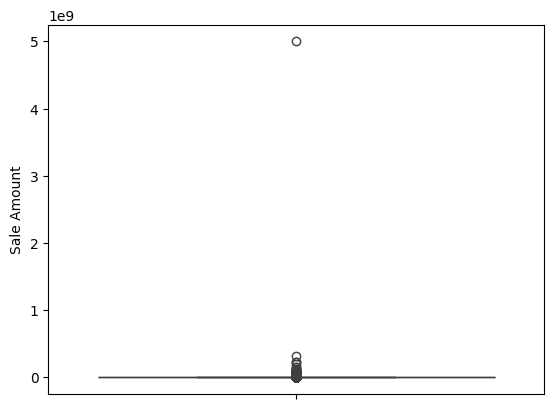

In [21]:
sns.boxplot(sales["Sale Amount"])
plt.show()

In [22]:
''' There is an outlier in the data so we are removing the outliers from the data'''
final_sales = sales[sales["Sale Amount"]<1000000000]

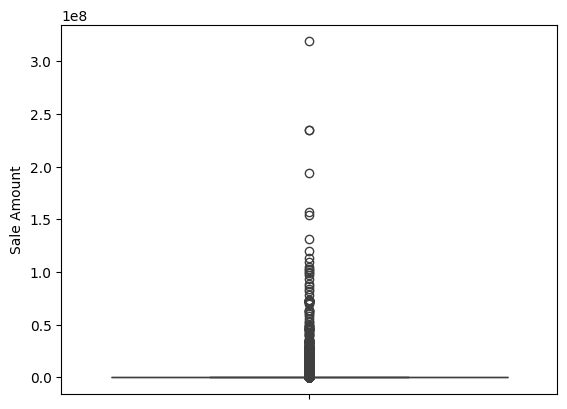

In [23]:
sns.boxplot(final_sales["Sale Amount"])
plt.show()

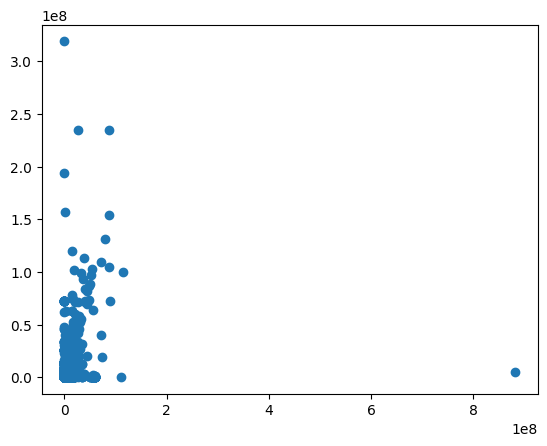

In [24]:
plt.scatter(final_sales['Assessed Value'],final_sales['Sale Amount'])
plt.show()

In [25]:
final_sales.head()

,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,06/20/2022,Avon,12 BYRON DRIVE,179990,362500.0,0.4965,Residential,Condo
1,04/18/2022,Bridgeport,55 CANNON ST,110610,50000.0,2.2122,Vacant Land,Other
2,2022-08-08 00:00:00,Bridgeport,540 JAMES ST,252150,650000.0,0.3879,Commercial,Other
3,08/30/2022,Bridgeport,126 KENNEDY DR,70850,130000.0,0.5450,Residential,Condo
4,2022-08-08 00:00:00,Bristol,477 PERKINS ST,45010,99900.0,0.4505,Vacant Land,Other


In [26]:
final_sales["Sale Date"] = pd.to_datetime(final_sales["Date Recorded"])
final_sales["Sale_Year"] = final_sales["Sale Date"].dt.year
final_sales["Sale_Month"] = final_sales["Sale Date"].dt.month
final_sales["Sale_Day"] = final_sales["Sale Date"].dt.day

In [27]:
final_sales.drop('Date Recorded',axis=1,inplace=True)
final_sales.head()

,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sale Date,Sale_Year,Sale_Month,Sale_Day
0,Avon,12 BYRON DRIVE,179990,362500.0,0.4965,Residential,Condo,2022-06-20,2022,6,20
1,Bridgeport,55 CANNON ST,110610,50000.0,2.2122,Vacant Land,Other,2022-04-18,2022,4,18
2,Bridgeport,540 JAMES ST,252150,650000.0,0.3879,Commercial,Other,2022-08-08,2022,8,8
3,Bridgeport,126 KENNEDY DR,70850,130000.0,0.5450,Residential,Condo,2022-08-30,2022,8,30
4,Bristol,477 PERKINS ST,45010,99900.0,0.4505,Vacant Land,Other,2022-08-08,2022,8,8


In [28]:
"""
Since there are too many unique addresses, it is not practical to convert them into numerical features for modeling. 
Instead of using the full address, we can aggregate the data at a higher level, such as town-wise sales. 
Additionally, the 'Sale Year' column can be removed, as it does not provide significant value for our model.
"""
final_sales.drop(['Sale_Year','Address','Sale Date','Sales Ratio'],axis = 1,inplace = True)
final_sales.head()

,Town,Assessed Value,Sale Amount,Property Type,Residential Type,Sale_Month,Sale_Day
0,Avon,179990,362500.0,Residential,Condo,6,20
1,Bridgeport,110610,50000.0,Vacant Land,Other,4,18
2,Bridgeport,252150,650000.0,Commercial,Other,8,8
3,Bridgeport,70850,130000.0,Residential,Condo,8,30
4,Bristol,45010,99900.0,Vacant Land,Other,8,8


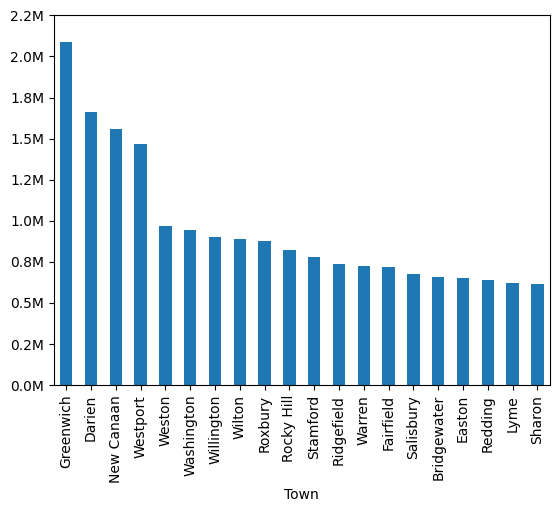

In [29]:
final_sales.groupby('Town')['Sale Amount'].mean().sort_values(ascending=False).head(20) .plot.bar()
plt.yticks([i * 10000 for i in range(0, 250, 25)] ,[f'{i/100:.1f}M' for i in range(0, 250, 25)] )
plt.show()

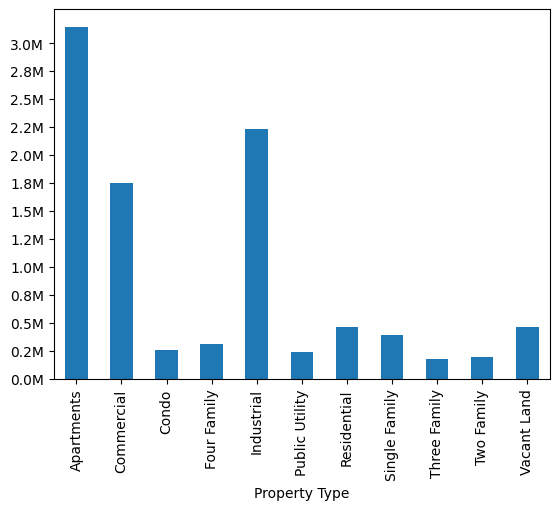

In [30]:
final_sales.groupby('Property Type')['Sale Amount'].mean().plot.bar()
plt.yticks([i * 10000 for i in range(0, 320, 25)] ,[f'{i/100:.1f}M' for i in range(0, 320, 25)] )
plt.show()

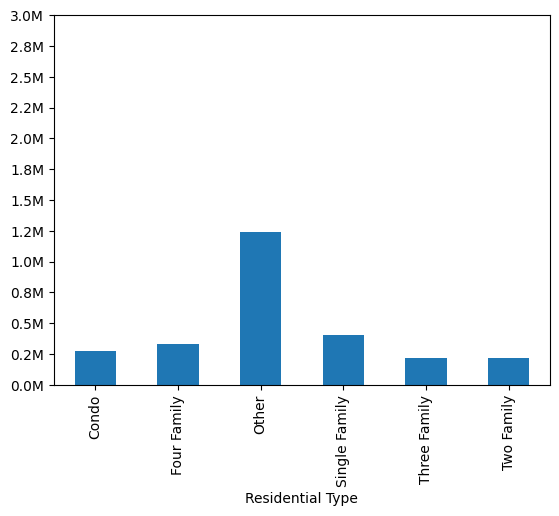

In [31]:
final_sales.groupby('Residential Type')['Sale Amount'].mean().plot.bar()
plt.yticks([i * 10000 for i in range(0, 320, 25)] ,[f'{i/100:.1f}M' for i in range(0, 320, 25)] )
plt.show()

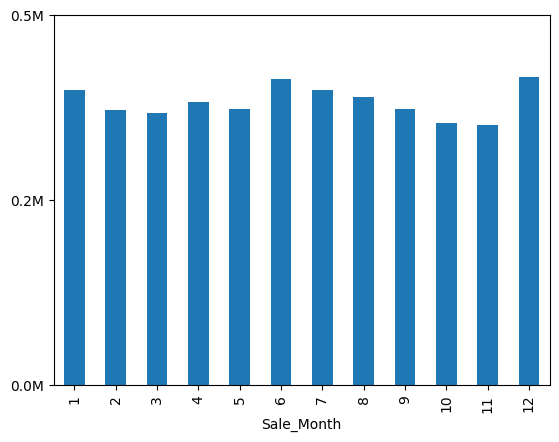

In [32]:
final_sales.groupby('Sale_Month')['Sale Amount'].mean().plot.bar()
plt.yticks([i * 10000 for i in range(0, 75, 25)] ,[f'{i/100:.1f}M' for i in range(0, 75, 25)] )
plt.show()

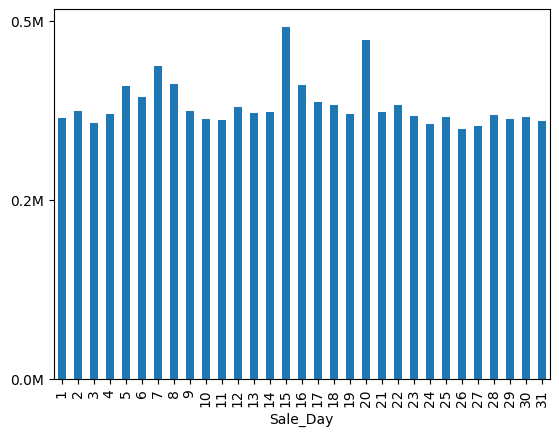

In [33]:
final_sales.groupby('Sale_Day')['Sale Amount'].mean().plot.bar()
plt.yticks([i * 10000 for i in range(0, 75, 25)] ,[f'{i/100:.1f}M' for i in range(0, 75, 25)] )
plt.show()

### Data Preprocessing

In [35]:
final_sales.head()

,Town,Assessed Value,Sale Amount,Property Type,Residential Type,Sale_Month,Sale_Day
0,Avon,179990,362500.0,Residential,Condo,6,20
1,Bridgeport,110610,50000.0,Vacant Land,Other,4,18
2,Bridgeport,252150,650000.0,Commercial,Other,8,8
3,Bridgeport,70850,130000.0,Residential,Condo,8,30
4,Bristol,45010,99900.0,Vacant Land,Other,8,8


In [36]:
'''
Converting categorical data into numerical values

other than Assessed Value remaning all columns are categorical columns

converting them into numerical values '''

cat_cols = ['Town','Property Type','Residential Type','Sale_Month','Sale_Day']

status = pd.get_dummies(final_sales[cat_cols],drop_first =True).astype(int)

In [37]:
preprocessed_sales = pd.concat([final_sales,status],axis=1)
preprocessed_sales.drop(cat_cols,axis=1,inplace=True)
preprocessed_sales.head()

,Assessed Value,Sale Amount,Town_Andover,Town_Ansonia,Town_Ashford,Town_Avon,Town_Barkhamsted,Town_Beacon Falls,Town_Berlin,Town_Bethany,...,Property Type_Residential,Property Type_Single Family,Property Type_Three Family,Property Type_Two Family,Property Type_Vacant Land,Residential Type_Four Family,Residential Type_Other,Residential Type_Single Family,Residential Type_Three Family,Residential Type_Two Family
0,179990,362500.0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,110610,50000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,252150,650000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,70850,130000.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,45010,99900.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


### Model Building

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
Sales_train,Sales_test =  train_test_split(preprocessed_sales,train_size=0.7)

In [43]:
Sales_train[['Assessed Value','Sale Amount']] = scaler.fit_transform(Sales_train[['Assessed Value','Sale Amount']])

In [44]:
Sales_test[['Assessed Value','Sale Amount']] = scaler.transform(Sales_test[['Assessed Value','Sale Amount']])

In [45]:
y_train = Sales_train.pop('Sale Amount')
X_train = Sales_train
y_test = Sales_test.pop('Sale Amount')
X_test = Sales_test

In [46]:
number_of_features = 20

### Automated Process from here (common for any linear regression )

In [48]:
'''
Feature selection using Recursive Feature Elimination

'''
import importlib
import recursive_feature_elemination as rfe_process

# Reload the module to get latest changes
importlib.reload(rfe_process)

rfe_class = rfe_process.RfeClass(X_train,y_train,number_of_features)
rfe_class.get_rfe_output()
selected_columns = rfe_class.top_columns
selected_columns

Index(['Assessed Value', 'Town_Darien', 'Town_Fairfield', 'Town_Greenwich',
       'Town_New Canaan', 'Town_Ridgefield', 'Town_Rocky Hill', 'Town_Roxbury',
       'Town_Stamford', 'Town_Warren', 'Town_Washington', 'Town_Weston',
       'Town_Westport', 'Town_Willington', 'Town_Wilton',
       'Property Type_Commercial', 'Property Type_Industrial',
       'Property Type_Public Utility', 'Property Type_Vacant Land',
       'Residential Type_Other'],
      dtype='object')

In [49]:
'''
Checking Vif values for the selected columns
'''

import variance_inflation_factor_data as vif_class

# Reload the module to get latest changes
importlib.reload(vif_class)

vif = vif_class.VIF(X_train[selected_columns])

vif.get_vif_values()

,Features,VIF
19,Residential Type_Other,12.48
18,Property Type_Vacant Land,7.32
15,Property Type_Commercial,5.56
16,Property Type_Industrial,1.58
0,Assessed Value,1.12
3,Town_Greenwich,1.06
1,Town_Darien,1.01
12,Town_Westport,1.01
4,Town_New Canaan,1.01
17,Property Type_Public Utility,1.01


In [50]:
'''
Checking p values for the selected columns
'''

import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[selected_columns])

sm_lr = sm.OLS(y_train,X_train_sm)

sm_lr = sm_lr.fit()

round(sm_lr.pvalues,4)

const                           0.0
Assessed Value                  0.0
Town_Darien                     0.0
Town_Fairfield                  0.0
Town_Greenwich                  0.0
Town_New Canaan                 0.0
Town_Ridgefield                 0.0
Town_Rocky Hill                 0.0
Town_Roxbury                    0.0
Town_Stamford                   0.0
Town_Warren                     0.0
Town_Washington                 0.0
Town_Weston                     0.0
Town_Westport                   0.0
Town_Willington                 0.0
Town_Wilton                     0.0
Property Type_Commercial        0.0
Property Type_Industrial        0.0
Property Type_Public Utility    0.0
Property Type_Vacant Land       0.0
Residential Type_Other          0.0
dtype: float64

In [51]:
'''
Removing the highly correlared features and p-values > 0.05 features
'''
import automated_feature_selection as feature_selection

importlib.reload(feature_selection)

final_features = feature_selection.final_data(X_train[selected_columns],y_train)
final_features

                     Features  p-value   VIF
0              Assessed Value      0.0  1.12
1                 Town_Darien      0.0  1.01
2              Town_Fairfield      0.0  1.00
3              Town_Greenwich      0.0  1.06
4             Town_New Canaan      0.0  1.01
5             Town_Ridgefield      0.0  1.00
6             Town_Rocky Hill      0.0  1.00
7                Town_Roxbury      0.0  1.00
8               Town_Stamford      0.0  1.00
9                 Town_Warren      0.0  1.00
10            Town_Washington      0.0  1.00
11                Town_Weston      0.0  1.00
12              Town_Westport      0.0  1.01
13            Town_Willington      0.0  1.00
14                Town_Wilton      0.0  1.00
15   Property Type_Commercial      0.0  1.01
16   Property Type_Industrial      0.0  1.00
17  Property Type_Vacant Land      0.0  1.00


['Assessed Value',
 'Town_Darien',
 'Town_Fairfield',
 'Town_Greenwich',
 'Town_New Canaan',
 'Town_Ridgefield',
 'Town_Rocky Hill',
 'Town_Roxbury',
 'Town_Stamford',
 'Town_Warren',
 'Town_Washington',
 'Town_Weston',
 'Town_Westport',
 'Town_Willington',
 'Town_Wilton',
 'Property Type_Commercial',
 'Property Type_Industrial',
 'Property Type_Vacant Land']

### Final Model Building

In [53]:
from sklearn.linear_model import LinearRegression

final_X_train = X_train[final_features]

lr = LinearRegression()
lr = lr.fit(final_X_train,y_train)

In [54]:
from sklearn.metrics import r2_score
r2_score(y_train,lr.predict(final_X_train))

0.26722795304060554

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test,lr.predict(X_test[final_features]))

-0.3749369178497928

Here r2 score is too low so our model is too week , her our intension was to follow all the steps for the result we have to fine tune.